In [38]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import soundfile
import vak

In [97]:
176 * 2

352

In [66]:
root = pathlib.Path('/home/ildefonso/Documents/data/vocal/bfsongrepo/transfer-learning/')

In [9]:
wavs = sorted(root.glob('*.wav'))

In [12]:
dat, fs = soundfile.read(wavs[0])

In [58]:
s, f, t = vak.spect.spectrogram(dat, fs, fft_size=1024, step_size=32, transform_type='log_spect')


In [59]:
np.diff(t).mean()

0.001

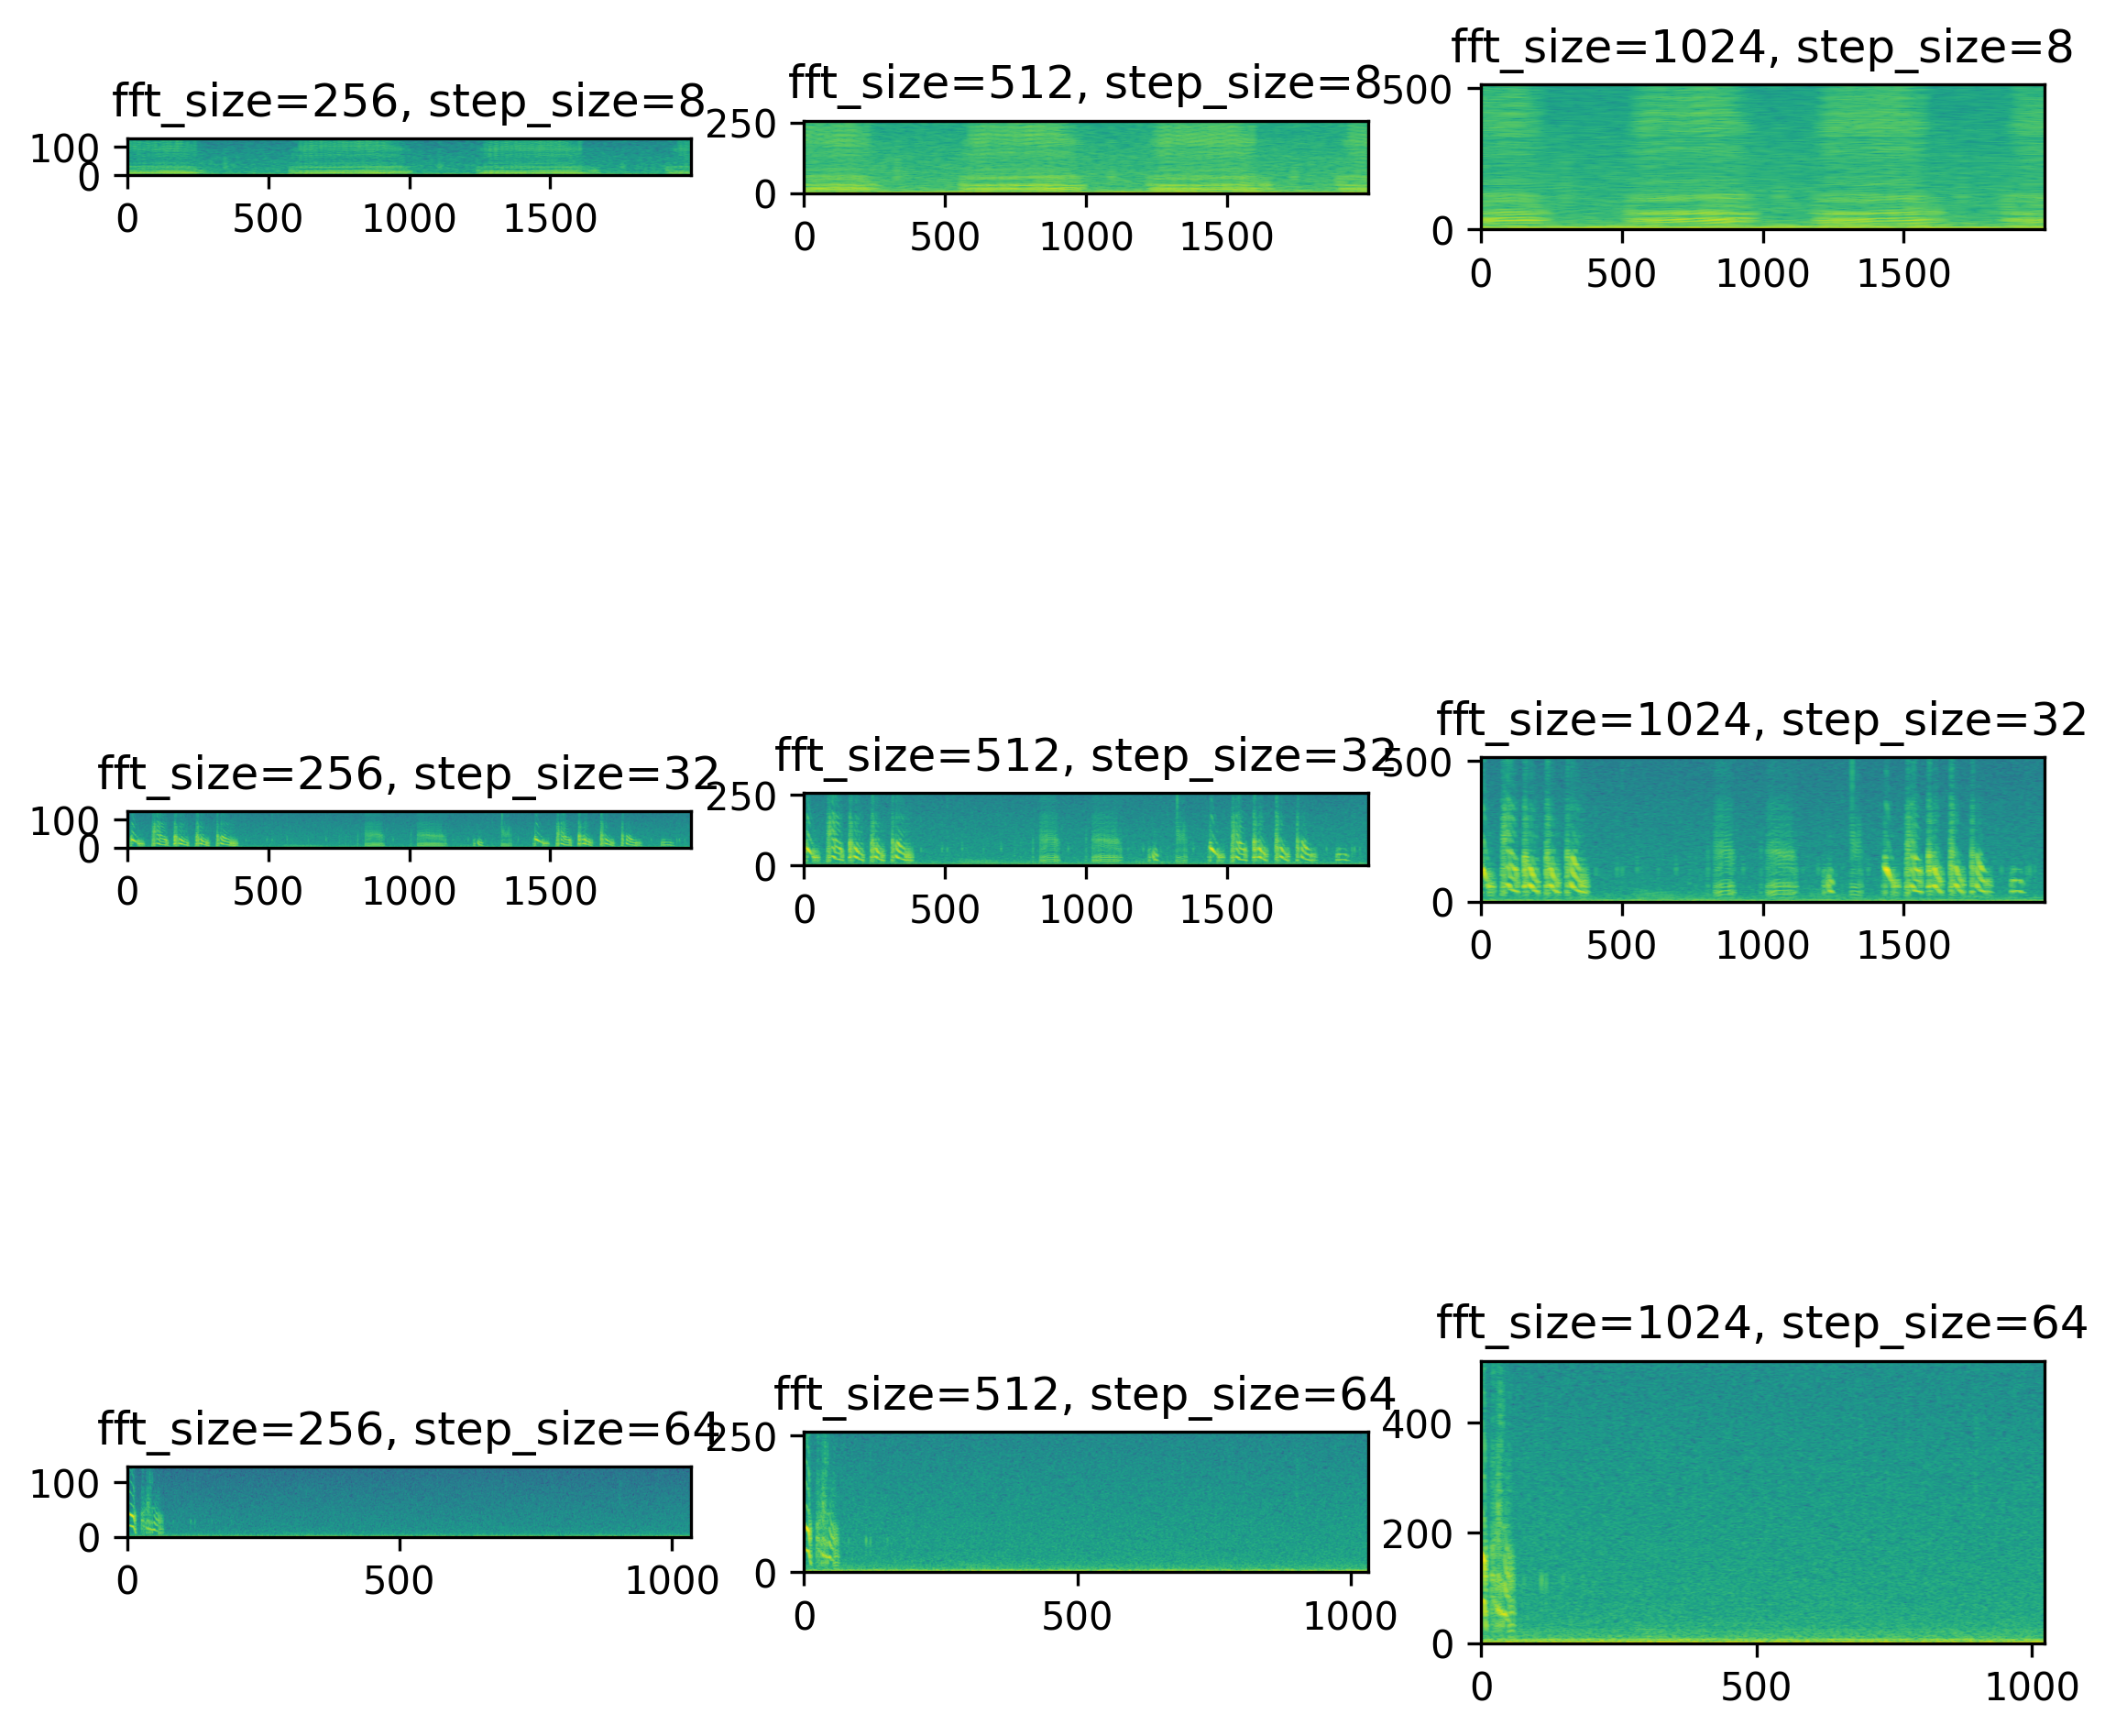

In [55]:
fig, ax_arr = plt.subplots(3, 3, figsize=(9, 9), dpi=300)

for col, fft_size in enumerate((256 , 512, 1024)):
    for row, step_size in enumerate((8, 32, 64)):
        s, f, t = vak.spect.spectrogram(dat, fs, 
                                        fft_size=fft_size, step_size=step_size,
                                        transform_type='log_spect')
        ax_arr[row, col].imshow(s[:, 3500:5500], origin='lower')
        ax_arr[row, col].set_title(f"fft_size={fft_size}, step_size={step_size}")

In [60]:
import crowsetta

In [67]:
scribe = crowsetta.Transcriber(format='simple-seq')

In [71]:
csvs = sorted(root.glob('*gr41rd51*.csv'))

In [89]:
silent_gap_durs = []

for csv in csvs:
    annot = scribe.from_file(csv).to_annot()
    silent_gap_durs_this_annot = annot.seq.onsets_s[1:] - annot.seq.offsets_s[:-1]
    silent_gap_durs.extend(silent_gap_durs_this_annot.tolist())

In [90]:
silent_gap_durs = np.array(silent_gap_durs)

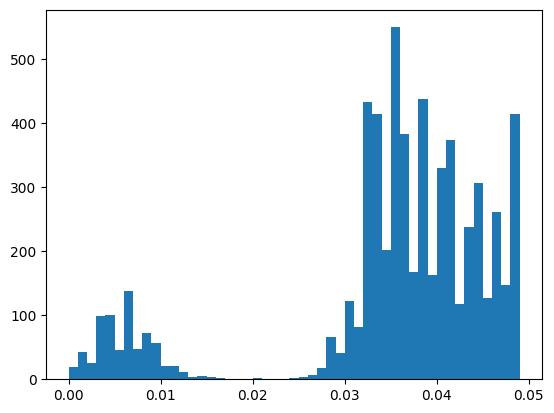

In [96]:
out = plt.hist(silent_gap_durs, bins=np.arange(0.000, 0.05, 0.001))